# Shapley Coalitions for Prosumers in NRG-X-Change Network





# Paying Prosumers Using NRG-X-Change 

**What is NRG-X-Change?**
"In  this  paper  we  propose  NRG-X-Change  —  anovel mechanism for trading of locally produced re-newable energy that does not rely on an energy mar-ket or matching of orders ahead of time. In our modellocally produced energy is continuously fed into thegrid and payment is received based on actual usage,rather than predicted, as consumption is measured bythe DSO (Distribution Service Operator) and billed in near real-time." (Mihail Mihaylov)

### Modeling a Prosumer Market

We will leverage an NRGX-Change based market of prosumers on an micro-grid. Any excess energy that is not consumed by the micro-grid is not considered at this time. The goal of each prosumer would be to offset the demand of the micro-grid. In most cases the total demand would need to be supplemented by the larger Grid at some retail electricity price. The network will use the payout and consumption functions for NRGX-Change as each prosumer generates every month. 

The prosumers (P) are indicated on the diagram as generators of electricity. In this scenario solar PV is shown as a generation source. The Distribution Service Operator (DSO) is in charge of consuming excess Net Energy that is generated by the prosumer and it is not consumed by the prosumer. A consumer (C) is the term for a residence that has to consumer more energy that it can produce. It will need to pay for electricity and the DSO would charge it at some price. The NRG-X-Change function will charge the consumer and pay the prosumer for electricity consumed or generated.


### Prosumer Payment Function 

The NRG-X-Change as described by the authors performs a dynamic payment to prosumers that are capable of meeting the demand of the micro-grid. The micro-grid is made of prosumers and consumers. As the load demand spikes the pricing for net generation also spikes to meet the demand. When there is too much generation on the grid the pricing drops encouraging prosumers to generate less and consumer to consume more. The payout function g(.) , utilizes a normalization component in the denominator to account for over or under generation distributing the payout along the curve. The payment is at its highest when generation meets the total demand and at its lowest as generation starts to saturate the market because of low demand. 

$$ g(x,t_p,t_c) = \frac{​​x^n* q_{t_p=t_c}​​}{e^{\frac{(t_p - t_c)^2}{a}}} $$

In [6]:
import math
# NRGXChange Payment g(.) Function
def g(price,X,tp,tc,a,n):
    q = price
    try:
        #print(f"n{n},tp{tp},tc{tc},a{a},q{q}")
        pay = (pow(X,n)*q)/math.exp(pow((tp-tc),2)/a)
    except OverflowError:
        pay = float('inf')
    return pay

### Consumer Charge/Cost Function

Where $x$, is the net energy of the prosumer. $q$, is the maximum price allowed. $t_p$ ,is the total produced energy of all prosumers. $t_c$ is the total consumption of all the prosumers. $a$ , is a scaling constant to adjust the pay out. Similarly lets consider the cost of energy for consumers to purchase based on pricing set by the h(.) function. In tandem these incentives are non-linear because of the distribution curve. The shape of that curve can be adjusted to the size of the network and the volatility of the network.

$$ h(y,t_p,t_c) = \frac{y*r_{t_c>>t_p}​*t_c​}{t_c+t_p} $$

Where $y$ is the withdrawn energy, and $r_{t_c>>t_p}​$ is the maximum cost of energy delivered by the utility when the energy supply by prosumers is low. Again, $t_p$ is the total production and $t_c$ is the total consumption of the prosumers in the network. The minimum payment by the utility in the historical payment prices would indicate the minimum amount willing to charge customers for energy in order to cover the cost of delivering the energy. We will use the minimum price in our list for $r$.

In [7]:
# NRGXChange Charge h(.) Function
def h(price,c,tp,tc):
    y = c
    r = (0.01*price)
    try:
        cost = (y*r*tc)/(tc+tp)
    except OverflowError:
        cost = float('inf')
    return cost

# Creating Coalitions Using Shapley Value

### Review of Game Theory and Shapley Value

The game is in terms of a **characteristic function**, which specfies for every group of players the total payoff that the members of S can by signing an greement among themselves; this payoff is available for distribution among the members of the group. A coalitional game with transferable payoff is a pair $<N,v>$ where $N=\{1,...,n\}$ is the set of players and for every subset S of I (called a coalition) $v(S) \in \mathbb{R} $ is the total payoff that is available for division among members of S (called the worth of S). We assume that the larger the coalition the larger the payoff (this property is called superadditivity).

An agreement amongst players is a list $(x_1,x_1,...,x_n)$  where $x_1,$ is the proposed payoff to individual i. Shapley value is interpreted in terms of **expected marginal contribution**. It is calculated by considering all the possible orders of arrival of the players into a room and giving each player his marginal contribution. 

In [8]:
# Shapley Value Python Logic 
# Authored by Susobhan Ghosh
# https://github.com/susobhang70
# Committed on 02/01/2020
from itertools import combinations
import bisect
#Create Combinatorial from List
def power_set(List):
    PS = [list(j) for i in range(len(List)) for j in combinations(List, i+1)]
    return PS
#Calculate Shapley from Characteristic Value list
def get_shapley(n,v):
    tempList = list([i for i in range(n)]) 
    N = power_set(tempList)
    shapley_values = []
    for i in range(n):
        shapley = 0
        for j in N:
            if i not in j:
                cmod = len(j)
                Cui = j[:]
                bisect.insort_left(Cui,i)
                l = N.index(j)
                k = N.index(Cui)
                temp = float(float(v[k]) - float(v[l])) *\
                           float(math.factorial(cmod) * math.factorial(n - cmod - 1)) / float(math.factorial(n))
                shapley += temp
        cmod = 0
        Cui = [i]
        k = N.index(Cui)
        temp = float(v[k]) * float(math.factorial(cmod) * math.factorial(n - cmod - 1)) / float(math.factorial(n))
        shapley += temp
        shapley_values.append(shapley)
    return shapley_values

 

In [9]:
#Test of Shapley Function Calculation
# Results in Shapley distribution of : Prosumer-1: $0.65, Prosumer-2: $0.39
n=2
p1_characteristic_value = 0.77
p2_characteristic_value = 0.51
p1_n_p2_characteristic_value = 1.04
v=[p1_characteristic_value,p2_characteristic_value,p1_n_p2_characteristic_value]
vals = get_shapley(n,v)
print(f"Prosumer-1: ${vals[0]}, Prosumer-2: ${vals[1]}")

Prosumer-1: $0.65, Prosumer-2: $0.39


# Pecan Street Data
Pecan Street is a research and development orgnaization that gathers data from active homes, solar homes and electric vehicle owners. According to Spandana Vadam , the pecan street data can be used to build out prosumers and calculating shapley value for coalitional contributions. 

The data ranges between 2015-09-23 and 2015-12-22 and is segmented by hour. The data is of 6 single family homes located in Austin, texas. Each home was installed with a PV system for the year of 2015. Each home has a 'Gen',power generated from PV systems, and a 'Use',whole-home electrical usage, value for every hour of the day during Fall, Spring and Winter. 

## Define Mathematical Model
The monthly average energy production is the individual energy production summed up across the entire Fall season and then devided by 3 for each month. The $Gen_{ai}$ in kWh is the average generation of the $i^th$ prosumer.

The generalized characteristic function, $v(i) = \frac{X*q}{e^\frac{[Gen_a-Use_a]^2}{a}}$ . When we apply it specifically to a single prosumer we must use the single prosumers net generation for $X$ and then consider all prosumer generation and all prosumer usage as a sum of the averages. Note, we will also choose the $q=\$10/kWh$ for the pricing and the scale factor , $a=10^6$.

$$ v(i) = \frac{(Gen_{ai}-Use_{ai})*10}{e^\frac{[\sum_{i=1}^{6}(Gen_{ai}) - \sum_{i=1}^{6}(Use_{ai})]^2}{10^6}} $$

## Computing Shapley value with data collected from Pecan Street
 


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-nw7s{background-color:#808080;text-align:center;vertical-align:bottom}
.tg .tg-bobw{font-weight:bold;text-align:center;vertical-align:bottom}
.tg .tg-6rnf{background-color:#808080;font-weight:bold;text-align:left;vertical-align:bottom}
.tg .tg-c4ze{color:#000000;font-weight:bold;text-align:center;vertical-align:middle}
.tg .tg-j6zm{font-weight:bold;text-align:left;vertical-align:bottom}
.tg .tg-jhwh{background-color:#808080;color:#000000;font-weight:bold;text-align:left;vertical-align:bottom}
.tg .tg-nrix{text-align:center;vertical-align:middle}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-j6zm">i(House)</th>
    <th class="tg-6rnf"> </th>
    <th class="tg-bobw" colspan="3">FALL</th>
    <th class="tg-6rnf"> </th>
    <th class="tg-bobw" colspan="3">Spring</th>
    <th class="tg-6rnf"> </th>
    <th class="tg-bobw" colspan="3">Winter</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c4ze">   <br>      <br>   Prosumer</td>
    <td class="tg-jhwh"> </td>
    <td class="tg-c4ze">   <br>   Monthly average Energy Production for Fall (kWh)   𝑮𝒆𝒏_𝒂𝒊</td>
    <td class="tg-c4ze">   <br>   Monthly average Energy Consumption for   Fall(kWh)    𝑼𝒔𝒆_𝒂𝒊</td>
    <td class="tg-c4ze">   <br>   Energy offered by each prosumer (kWh) (X)</td>
    <td class="tg-jhwh"> </td>
    <td class="tg-c4ze">   <br>   Monthly average Energy Production for Spring   (kWh) 𝑮𝒆𝒏_𝒂𝒊</td>
    <td class="tg-c4ze">   <br>   Monthly average Energy Consumption for Spring   (kWh)    𝑼𝒔𝒆_𝒂𝒊</td>
    <td class="tg-c4ze">   <br>   Energy offered by each prosumer (kWh) (X)</td>
    <td class="tg-jhwh"> </td>
    <td class="tg-c4ze">   <br>   Monthly average Energy Production for Winter   (kWh) 𝑮𝒆𝒏_𝒂𝒊</td>
    <td class="tg-c4ze">   <br>   Monthly average Energy Consumption for Winter   (kWh)    𝑼𝒔𝒆_𝒂𝒊</td>
    <td class="tg-c4ze">   <br>   Energy offered by each prosumer (kWh) (X)</td>
  </tr>
  <tr>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>1</td>
    <td class="tg-nw7s"> </td>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>1473</td>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>1523&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-nrix" rowspan="2">-50.00</td>
    <td class="tg-nw7s"> </td>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>&nbsp;&nbsp;&nbsp;1514</td>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>&nbsp;&nbsp;&nbsp;1431&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-nrix" rowspan="2">83.00</td>
    <td class="tg-nw7s"> </td>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>1239</td>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>1138&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-nrix" rowspan="2">101.00</td>
  </tr>
  <tr>
    <td class="tg-nw7s"> </td>
    <td class="tg-nw7s"> </td>
    <td class="tg-nw7s"> </td>
  </tr>
  <tr>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>2</td>
    <td class="tg-nw7s"> </td>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>1215</td>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>1056&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-nrix" rowspan="2">159.00</td>
    <td class="tg-nw7s"> </td>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>&nbsp;&nbsp;&nbsp;1937&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-nrix" rowspan="2">1279</td>
    <td class="tg-nrix" rowspan="2">658.00</td>
    <td class="tg-nw7s"> </td>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>1045&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-nrix" rowspan="2">903</td>
    <td class="tg-nrix" rowspan="2">142.00</td>
  </tr>
  <tr>
    <td class="tg-nw7s"> </td>
    <td class="tg-nw7s"> </td>
    <td class="tg-nw7s"> </td>
  </tr>
  <tr>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>3</td>
    <td class="tg-nw7s"> </td>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>1006</td>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>367&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-nrix" rowspan="2">639.00</td>
    <td class="tg-nw7s"> </td>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>&nbsp;&nbsp;&nbsp;1337&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-nrix" rowspan="2">378</td>
    <td class="tg-nrix" rowspan="2">959.00</td>
    <td class="tg-nw7s"> </td>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>871&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-nrix" rowspan="2">288</td>
    <td class="tg-nrix" rowspan="2">583.00</td>
  </tr>
  <tr>
    <td class="tg-nw7s"> </td>
    <td class="tg-nw7s"> </td>
    <td class="tg-nw7s"> </td>
  </tr>
  <tr>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>4</td>
    <td class="tg-nw7s"> </td>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>643</td>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>970&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-nrix" rowspan="2">-327.00</td>
    <td class="tg-nw7s"> </td>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>&nbsp;&nbsp;&nbsp;903&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-nrix" rowspan="2">1087</td>
    <td class="tg-nrix" rowspan="2">-184.00</td>
    <td class="tg-nw7s"> </td>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>575&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-nrix" rowspan="2">810</td>
    <td class="tg-nrix" rowspan="2">-235.00</td>
  </tr>
  <tr>
    <td class="tg-nw7s"> </td>
    <td class="tg-nw7s"> </td>
    <td class="tg-nw7s"> </td>
  </tr>
  <tr>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>5</td>
    <td class="tg-nw7s"> </td>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>1737</td>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>676&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-nrix" rowspan="2">1061.00</td>
    <td class="tg-nw7s"> </td>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>&nbsp;&nbsp;&nbsp;1996&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-nrix" rowspan="2">749</td>
    <td class="tg-nrix" rowspan="2">1247.00</td>
    <td class="tg-nw7s"> </td>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>1447&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-nrix" rowspan="2">406</td>
    <td class="tg-nrix" rowspan="2">1041.00</td>
  </tr>
  <tr>
    <td class="tg-nw7s"> </td>
    <td class="tg-nw7s"> </td>
    <td class="tg-nw7s"> </td>
  </tr>
  <tr>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>6</td>
    <td class="tg-nw7s"> </td>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>1518</td>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>1098&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-nrix" rowspan="2">420.00</td>
    <td class="tg-nw7s"> </td>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>&nbsp;&nbsp;&nbsp;1560&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-nrix" rowspan="2">1346</td>
    <td class="tg-nrix" rowspan="2">214.00</td>
    <td class="tg-nw7s"> </td>
    <td class="tg-nrix" rowspan="2">&nbsp;&nbsp;&nbsp;<br>1273&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-nrix" rowspan="2">677</td>
    <td class="tg-nrix" rowspan="2">596.00</td>
  </tr>
  <tr>
    <td class="tg-nw7s"> </td>
    <td class="tg-nw7s"> </td>
    <td class="tg-nw7s"> </td>
  </tr>
  <tr>
    <td class="tg-nrix">Total</td>
    <td class="tg-nw7s"> </td>
    <td class="tg-nrix">7592.00</td>
    <td class="tg-nrix">5690.00</td>
    <td class="tg-nrix">1902.00</td>
    <td class="tg-nw7s"> </td>
    <td class="tg-nrix">9247.00</td>
    <td class="tg-nrix">6270.00</td>
    <td class="tg-nrix">2977.00</td>
    <td class="tg-nw7s"> </td>
    <td class="tg-nrix">6450.00</td>
    <td class="tg-nrix">4222.00</td>
    <td class="tg-nrix">2228.00</td>
  </tr>
</tbody>
</table>

In [10]:
from pandas import DataFrame
# Convert Pecan Data into dataset by trial to analyze
pecan_data = [
    {'id':1,'time':'Fall','generation':1473,'consumption':1523},
    {'id':2,'time':'Fall','generation':1215,'consumption':1056},
    {'id':3,'time':'Fall','generation':1005,'consumption':367},
    {'id':4,'time':'Fall','generation':643,'consumption':970},
    {'id':5,'time':'Fall','generation':1737,'consumption':676},
    {'id':6,'time':'Fall','generation':1518,'consumption':1098},
    {'id':1,'time':'Spring','generation':1514,'consumption':1431},
    {'id':2,'time':'Spring','generation':1937,'consumption':1279},
    {'id':3,'time':'Spring','generation':1337,'consumption':378},
    {'id':4,'time':'Spring','generation':903,'consumption':1087},
    {'id':5,'time':'Spring','generation':1996,'consumption':749},
    {'id':6,'time':'Spring','generation':1560,'consumption':1346},
    {'id':1,'time':'Winter','generation':1239,'consumption':1138},
    {'id':2,'time':'Winter','generation':1045,'consumption':903},
    {'id':3,'time':'Winter','generation':871,'consumption':288},
    {'id':4,'time':'Winter','generation':575,'consumption':810},
    {'id':5,'time':'Winter','generation':1447,'consumption':406},
    {'id':6,'time':'Winter','generation':1273,'consumption':677}
]
pecan_df = DataFrame(pecan_data)
pecan_df['net_energy'] = pecan_df['generation'] - pecan_df['consumption']

In [11]:

####################################################################
# Calculate the shapley value given the net energy and the average 
# generation and consumption values
####################################################################
def get_nrg_payments( df,price,n,a=0,drop_negative_contribution=False):
    for t in df:
        # drop the prosumer from consideration if the energy offered
        # by the prosumer is a negative value
        if drop_negative_contribution:
            index_names = t[ t['net_energy'] < 0 ].index
            t.drop(index_names, inplace = True)
 
        tp = t['generation'].sum()
        tc = t['consumption'].sum()
        net_energy = t['net_energy']
    
        ## shapley without coalition, only depends on characteristic
        # equation Y=X^n
        t['shapley_wo_coalition'] = net_energy.apply(lambda x: 
        g(price=price,X=x,tc=tc,tp=tp,n=n,a=a))

        ## Implement shapley function 
        # Use the id of each prosumer in order to build a factorial powerset
        # the power set is used by summing the energy contributed as a coalition
        # the aggregate energy is then sent to NRG payment function 
        # the response is the shapley contribution payout for that coalition
        List = t['id']
        PS = [list(j) for i in range(len(List)) for j in combinations(List, i+1)]
        shapley_contributions = []
        for coalition_combination in PS:
            # energy contribution of the coalitional combination
            contribution = t.loc[t['id'].isin(coalition_combination)]['net_energy'].sum()
            # get nrg payment for the contribution of the coalitional combination
            nrg_payment = g(price=price,X=contribution,tc=tc,tp=tp,n=n,a=a) 
            shapley_contributions.append(nrg_payment)
        t['shapley_w_coalition'] = get_shapley(len(t['id']),shapley_contributions)


    return df

####################################################################
# print the tables for each season to show the shapley value w/wo 
# coalitional contribution
####################################################################
def print_tables(df,n=1,title=''):
    tb = 1
    for t in df:
        t = t.reindex(columns=['id','time','generation','consumption',
        'net_energy','shapley_w_coalition','shapley_wo_coalition'])
        display(HTML(f"<h1>{title}</h1></br> Table {tb}: {t.iloc[0]['time']} Y=X^{n} </br>{t.to_html(index=False)}"))
        tb=tb+1

In [12]:
#Test of Example 1
# Results in Shapley distribution of : Prosumer-1: $0.65, Prosumer-2: $0.39
n=2
p1_characteristic_value = 0.77
p2_characteristic_value = 0.51
p1_n_p2_characteristive_value = 1.04
v=[p1_characteristic_value,p2_characteristic_value,p1_n_p2_characteristive_value]
vals = get_shapley(n,v)
print(f"Prosumer-1: ${vals[0]}, Prosumer-2: ${vals[1]}")

Prosumer-1: $0.65, Prosumer-2: $0.39


## 
The characteristic function results in a shapley value for each of the prosumers for each of the time periods. 

In [13]:
from IPython.display import display, HTML
pecan_df_by_t = [DataFrame(y) for x, y in pecan_df.groupby('time', as_index=False)]
x1_pecan_df_by_t = get_nrg_payments(pecan_df_by_t,price=10,a=1000000,n=1)
print_tables(x1_pecan_df_by_t)

id,time,generation,consumption,net_energy,shapley_w_coalition,shapley_wo_coalition
1,Fall,1473,1523,-50,-13.474609,-13.474609
2,Fall,1215,1056,159,42.849257,42.849257
3,Fall,1005,367,638,171.936011,171.936011
4,Fall,643,970,-327,-88.123943,-88.123943
5,Fall,1737,676,1061,285.931203,285.931203
6,Fall,1518,1098,420,113.186715,113.186715


id,time,generation,consumption,net_energy,shapley_w_coalition,shapley_wo_coalition
1,Spring,1514,1431,83,0.117525,0.117525
2,Spring,1937,1279,658,0.931705,0.931705
3,Spring,1337,378,959,1.357911,1.357911
4,Spring,903,1087,-184,-0.260538,-0.260538
5,Spring,1996,749,1247,1.765709,1.765709
6,Spring,1560,1346,214,0.303017,0.303017


id,time,generation,consumption,net_energy,shapley_w_coalition,shapley_wo_coalition
1,Winter,1239,1138,101,7.054894,7.054894
2,Winter,1045,903,142,9.918762,9.918762
3,Winter,871,288,583,40.722806,40.722806
4,Winter,575,810,-235,-16.414853,-16.414853
5,Winter,1447,406,1041,72.714307,72.714307
6,Winter,1273,677,596,41.630862,41.630862


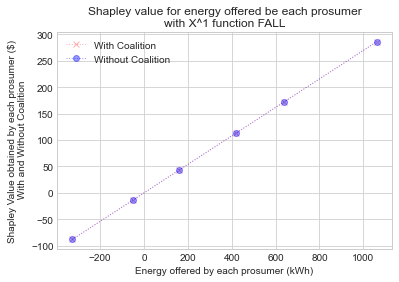

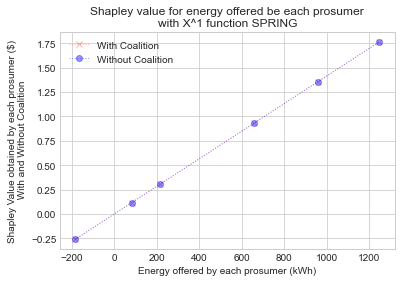

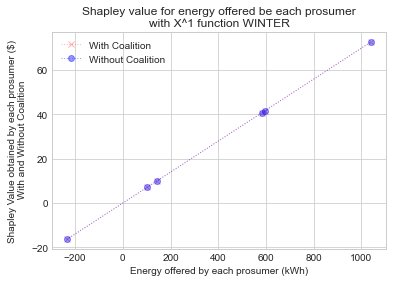

In [21]:
import numpy as np
import matplotlib.pyplot as plt

####################################################################
# print the tables in a plot
####################################################################
def plot_tables(df,n=1):
    for t in df:
        plt.style.use('seaborn-whitegrid')
        fig = plt.figure()
        ax = plt.axes()
        t = t.sort_values(by='net_energy')
        plt.title(f"Shapley value for energy offered be each prosumer\nwith X^{n} function {t.iloc[0]['time'].upper()}")
        plt.xlabel("Energy offered by each prosumer (kWh)")
        plt.ylabel("Shapley Value obtained by each prosumer ($)\n With and Without Coalition");
        plt.plot(t['net_energy'], t['shapley_w_coalition'], ':xr', label='With Coalition', linewidth=1, alpha=0.3)
        plt.plot(t['net_energy'], t['shapley_wo_coalition'], ':ob', label='Without Coalition',linewidth=1, alpha=0.4)
        plt.legend();
        ax.plot();

plot_tables(x1_pecan_df_by_t)

## Modify the Linearity of the Characteristic Function ($X^n$)
Negtaive Shapley value means tha the prosumer owes to a coalition. But Shapley values are not used to define how much money the prosumer owes. Therefore the prosumers with negative Shapley values will be ignored. Only those prosumers with positive Shapley values will be considered in this section, by excluding prosumers whose average production values are less than consumption values. In the end the results would show if the psoumer recieves higher profits by forming coalitions.


In [22]:
from IPython.display import display, HTML
pecan_df_by_t = [DataFrame(y) for x, y in pecan_df.groupby('time', as_index=False)]
x1p5_pecan_df_by_t = get_nrg_payments(pecan_df_by_t,price=10,a=1000000,n=1.5,drop_negative_contribution=True)
print_tables(x1p5_pecan_df_by_t,n=1.5)

id,time,generation,consumption,net_energy,shapley_w_coalition,shapley_wo_coalition
2,Fall,1215,1056,159,403.535400,111.793945
3,Fall,1005,367,638,1689.509355,898.573511
5,Fall,1737,676,1061,2874.425956,1927.061920
6,Fall,1518,1098,420,1095.049136,479.950589


id,time,generation,consumption,net_energy,shapley_w_coalition,shapley_wo_coalition
1,Spring,1514,1431,83,2.017967,0.346084
2,Spring,1937,1279,658,16.744626,7.725075
3,Spring,1337,378,959,24.749423,13.592263
5,Spring,1996,749,1247,32.543414,20.154105
6,Spring,1560,1346,214,5.283899,1.432796


id,time,generation,consumption,net_energy,shapley_w_coalition,shapley_wo_coalition
1,Winter,1239,1138,101,110.611444,23.544609
2,Winter,1045,903,142,156.426309,39.250205
3,Winter,871,288,583,666.826403,326.521851
5,Winter,1447,406,1041,1219.240313,779.086201
6,Winter,1273,677,596,682.241348,337.503909


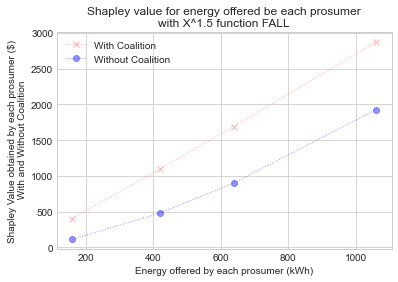

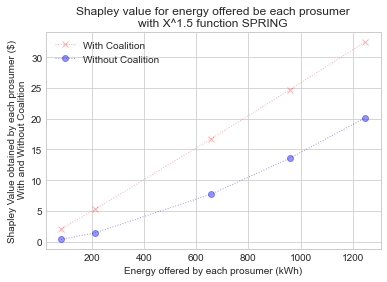

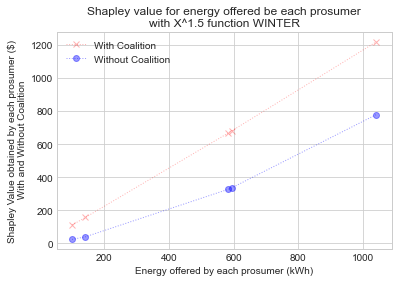

In [23]:

plot_tables(x1p5_pecan_df_by_t,n=1.5)

## Prosumer Synthesized Data from EIA.gov

The data gathered is from EIA.gov. The data was then used to synthesize typical prosumer consumption and generation over the course of 12 months. Volatitlity in the usage and generation was added as a normal distribution with a given variance to simulate real world conditions. The data is pulled from a local file and then sorted by timestamp. The fields are grouped by id and by time. Grouping by time allows for settlement calculations to occur at each time interval.

In [28]:
import pandas as pd
import numpy as np
####################################################################
# Data Gathering
####################################################################
# Data gathering and synthesization has been done in a seperate module.
# import the external data gathering set. Pull data from a dataset 
# of randomly insantiated prosumer, synthesized from EIA.gov data trends
# 
import p0_data_gather as p0

####################################################################
# get dataset by calling the local file and queirying for 
# parameters desired. 
####################################################################
def get_eia_dataset():
    # Set path of dataset file containing all parameterized values
    data_set_path = 'data/prosumer_N10_all_20210305_1129.csv'
    # Set initial conditions for prosumers dataset
    dem_mean = 1100
    gen_mean = 1300 
    # Set number of prosumers, an array of N[] values for multiple experiments 
    number_of_prosumers_for_each_trial = [3,5,10]
    # Trials [] holds session data for each N itteration of prosumers
    eia_dataset_trials = []
    for N in number_of_prosumers_for_each_trial:
        # Call the data as a query with the instantiated values
        eia_dataset = p0.get_data(path=data_set_path,query=f'id > 0 & id<={N} & demand_std == {dem_mean*0.20} & generation_std == {gen_mean*0.20} & generation_mean == {gen_mean} & demand_mean == {dem_mean}')
        eia_dataset['net_energy'] = eia_dataset['generation'] - eia_dataset['consumption']
        # Data Wrangling : Split data by time 't'
        ####################################################################
        # Wrangle data into monthly timesteps then add to an object for each trial
        eia_dataset_by_t = [pd.DataFrame(y) for x, y in eia_dataset.groupby('time', as_index=False)]
        eia_trial = {"N":N, "df":eia_dataset,"df_by_t":eia_dataset_by_t}
        eia_dataset_trials.append(eia_trial)
    return eia_dataset_trials

eia_dataset_trials = get_eia_dataset()
print(eia_dataset_trials)


74     0.000000   785.472474   
6075116    6 2020-01-01   621.511333   758.046211     0.000000   758.046211   
7284956    7 2020-01-01   657.208197   857.101557     0.000000   857.101557   
8494796    8 2020-01-01   648.426839   682.949102     0.000000   682.949102   
9704636    9 2020-01-01   719.260027   759.011678     0.000000   759.011678   
10914476  10 2020-01-01   649.634494   589.870317    59.764178   530.106139   

          price  demand_std  generation_std  generation_mean  demand_mean  
25916     11.72       220.0           260.0             1300         1100  
1235756   11.72       220.0           260.0             1300         1100  
2445596   11.72       220.0           260.0             1300         1100  
3655436   11.72       220.0           260.0             1300         1100  
4865276   11.72       220.0           260.0             1300         1100  
6075116   11.72       220.0           260.0             1300         1100  
7284956   11.72       220.0           26

## Running Trials 
The trial for each dataset is a colelction of N prosumers. The trials are ran with the parameters for the characteristive function response $X^{n}$ varying for the value of $n$. The other parameter that can be adjusted is the scalar $a$. The running trials leverages the EIA.gov dataset for a maximum price to pay out during the trial. This value can also be adjusted if needed in the future revisions. 

In [25]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

def run_trials(a,n=1):
    for eia_dataset_trial in eia_dataset_trials:
        N = eia_dataset_trial['N']
        df = eia_dataset_trial['df']
        df_by_t = eia_dataset_trial['df_by_t']
        price = df['price'].max()
        eia_dataset_trial['df_by_t'] = get_nrg_payments(df_by_t,price=price,a=a,n=n,drop_negative_contribution=True)
    return eia_dataset_trials

In [26]:
def plot_trials(trials,n):
    for eia_dataset_trial in eia_dataset_trials:
        X = [x for x in  eia_dataset_trial['df']['time'].unique().tolist()]
        Y_wo = [t['shapley_wo_coalition'].sum() for t in eia_dataset_trial['df_by_t']]
        Y_w = [t['shapley_w_coalition'].sum() for t in eia_dataset_trial['df_by_t']]
        Z = [t['net_energy'].sum() for t in  eia_dataset_trial['df_by_t']]
        ax = plt.axes(projection='3d')
        ax.set_title(f"EIA.gov Trial-N={eia_dataset_trial['N']},X^{n}",loc="right")
        ax.set_xlabel("Time")
        ax.set_ylabel("Shapley Value")
        ax.set_zlabel("Net Energy")
        ax.scatter3D(X, Y_wo, Z, c=Z,cmap='Blues');
        ax.plot3D(X, Y_wo, Z,'blue',label='Without Coalition',marker='o');
        ax.scatter3D(X, Y_w, Z, c=Z,cmap='Reds');
        ax.plot3D(X, Y_w, Z,'red',label='With Coalition',marker='x');
        ax.legend(loc='upper left')
        plt.show()
        #print_tables(df_by_t,n=1.5)

## Consider Convex , Linear & Concave characteristic functions

We consider a comunity of solar prosumers $P={1,2,3..N}$ , who agree to form a coalition and produce energy. The number of possible coalitions are $2^{n}$ and the number of ways to build the grand coalition is $N!$. The coalitional contribution is compared at different N prosumers and at different characteristic function pay out to observer the impact as the network scales


In [43]:
####################################################################
# Consider Convex , Linear & Concave characteristic functions
####################################################################
# Adjust the value of 'X^n' used in NRG payment function
X_n= [1]
for n in X_n :
    trials = run_trials(n=n,a=1000000)
    for t in trials:
        t['df'].to_csv(f"data/payload_nrg{t['N']}.csv",index=False)
    plot_trials(trials=trials,n=n)

AttributeError: 'list' object has no attribute 'to_csv'